In [128]:
#!pip install brisque

In [142]:
import cv2
import warnings
import imquality.brisque as brisque
from brisque import BRISQUE
warnings.filterwarnings('ignore')



In [143]:
path = "testing_images"
img_1 = "{}/img_1.jpeg".format(path)
img_2 = "{}/img_2.jpeg".format(path)
img_3 = "{}/img_3.jpeg".format(path)
img_4 = "{}/img_4.heic".format(path)
img_5 = "{}/img_5.heic".format(path)
img_6 = "{}/img_6.heic".format(path)

In [144]:
blur_clf = joblib.load("blur_clf.joblib") 
sharp_clf = joblib.load("sharp_clf.joblib")
cb_clf = joblib.load("cb_clf.joblib")

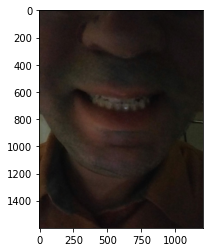

BRISQUE SCORE: 58.73376128587674
[Acceptable Blurriness: True, Acceptable Sharpness: False, Acceptable Brightness/Contrast: False]


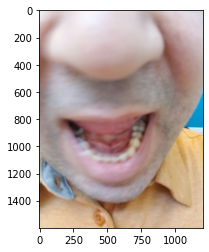

BRISQUE SCORE: 49.44528955311225
[Acceptable Blurriness: True, Acceptable Sharpness: False, Acceptable Brightness/Contrast: False]


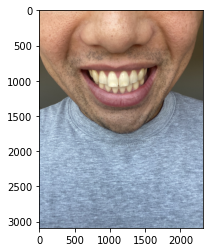

BRISQUE SCORE: 25.048792822591594
[Acceptable Blurriness: True, Acceptable Sharpness: True, Acceptable Brightness/Contrast: True]


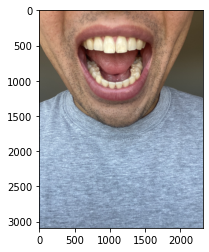

BRISQUE SCORE: 25.615045430965296
[Acceptable Blurriness: True, Acceptable Sharpness: True, Acceptable Brightness/Contrast: True]


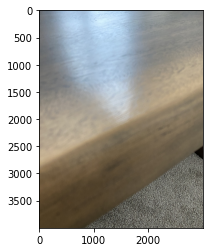

BRISQUE SCORE: 30.356901681326775
[Acceptable Blurriness: True, Acceptable Sharpness: False, Acceptable Brightness/Contrast: True]


In [146]:
img_fn = (img_1, img_2, img_4, img_5, img_6)
array = []
i = 0
for img_f in img_fn:
    img = cv2.imread(img_f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img) 
    plt.show()
    
    obj = BRISQUE(img_f, url=False)
    brisque_score = obj.score()
    
    print("BRISQUE SCORE: {}".format(brisque_score))
    b_val = blur_clf.predict([[brisque_score]])[0] # output of prediction blurriness
    s_val = sharp_clf.predict([[brisque_score]])[0] # output of prediction sharpness
    c_val = cb_clf.predict([[brisque_score]])[0] # output of prediction brightness/contrast
    print("[Acceptable Blurriness: {}, Acceptable Sharpness: {}, Acceptable Brightness/Contrast: {}]".format(b_val, s_val, c_val))
    print("==="*35)

